In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import GoldenRatio

In [85]:
def fibonacci(n):
    fib = np.zeros(n)
    fib[0] = 0
    fib[1] = 1

    ratio = np.zeros(n)
    
    for i in range(2, n):
        fib[i] = fib[i-1] + fib[i-2]
        ratio[i] = fib[i] / fib[i-1]
    
    fib = np.array(fib, dtype=int)
    print('Fibonacci sequence:            ', fib)
    return fib, ratio


In [86]:
# Example usage
n = 15
fib, ratio = fibonacci(n)
cumfib = np.array(np.cumsum(fib), dtype=int)
print('Cumulative Fibonacci sequence: ', np.array(cumfib))


Fibonacci sequence:             [  0   1   1   2   3   5   8  13  21  34  55  89 144 233 377]
Cumulative Fibonacci sequence:  [  0   1   2   4   7  12  20  33  54  88 143 232 376 609 986]


$CumF_n = F_{n+2}-1$

$CumF_n = CumF_{n-2} + F_{n-1}$

$CumF_n = CumF_{n-1} + F_{n}$

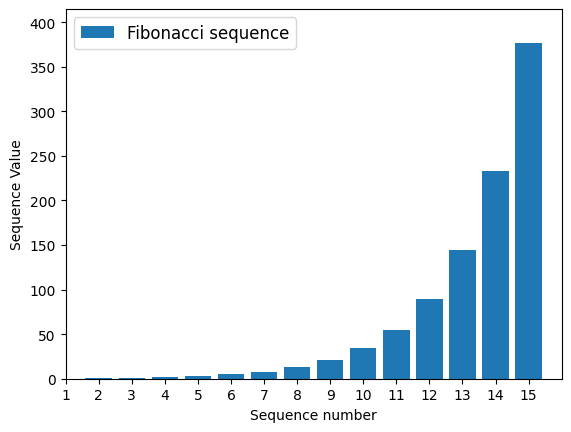

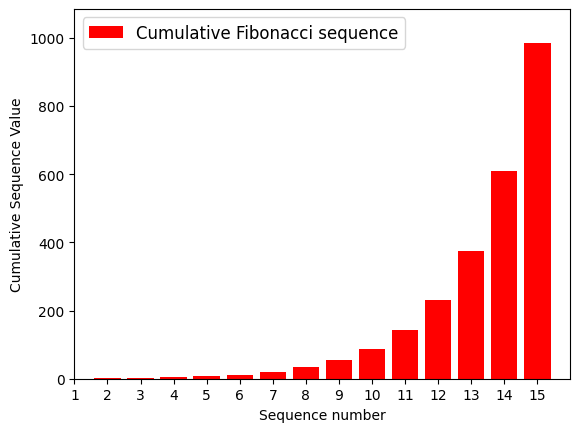

In [87]:
N = np.arange(1, n+1)

# Plotting Fibonacci sequence and cumulative Fibonacci sequence
plt.figure(1)
plt.bar(N, fib, label='Fibonacci sequence')
plt.xlabel('Sequence number')
plt.ylabel('Sequence Value')
plt.axis([1, n+1, 0, max(fib)*1.1])
plt.xticks(np.arange(1, n+1, 1))
plt.legend(loc='upper left', fontsize=12)
plt.show()

# Plotting Fibonacci cumulative sequence
plt.figure(2)
plt.bar(N, cumfib,color = 'red', label='Cumulative Fibonacci sequence') 
plt.axis([1, n+1, 0, max(cumfib[1:])*1.1])
plt.xticks(np.arange(1, n+1, 1))
plt.xlabel('Sequence number')
plt.ylabel('Cumulative Sequence Value')
plt.legend(loc='upper left', fontsize=12)
plt.show()


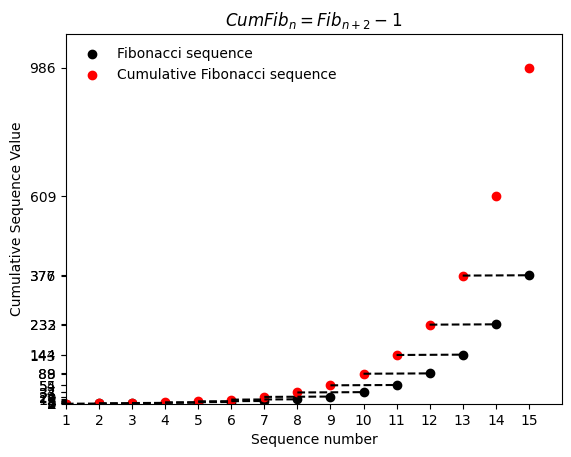

In [88]:
# Plotting Fibonacci cumulative sequence
plt.figure(3)
plt.scatter(N, fib, color = 'black', label='Fibonacci sequence')
plt.scatter(N, cumfib,color = 'red', label='Cumulative Fibonacci sequence')
i = 1
while i < n-1:
    plt.plot([i, i+2], [cumfib[i-1], fib[i+1]], '--k')
    i = i+1
    if i == n-1:
        plt.title("$CumFib_n = Fib_{n+2}-1$")
plt.axis([1, n+1, 0, max(cumfib[1:])*1.1])
plt.xticks(np.arange(1, n+1, 1))
plt.yticks(np.unique(np.concatenate((fib, cumfib))))
plt.xlabel('Sequence number')
plt.ylabel('Cumulative Sequence Value')
plt.legend(loc='upper left', frameon = False)
plt.show()


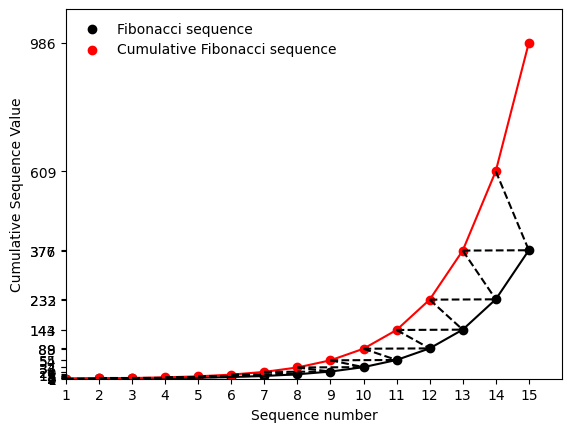

In [89]:
plt.figure(4)
plt.scatter(N, fib, color = 'black', label='Fibonacci sequence')
plt.scatter(N, cumfib ,color = 'red', label='Cumulative Fibonacci sequence')
plt.plot(N, fib, color = 'black')
plt.plot(N, cumfib ,color = 'red')

#Fazer as retas diagonais
i=3
while i <= n:
    plt.plot([i-1, i], [cumfib[i-2], fib[i-1]], '--k')
    i = i+1
    
# Fazer as retas paralelas
i=1
while i < n-1:
    plt.plot([i, i+2], [cumfib[i-1], fib[i+1]], '--k')
    i = i+1
   
plt.axis([1, n+1, 0, max(cumfib[1:])*1.1])
plt.xticks(np.arange(1, n+1, 1))
plt.yticks(np.unique(np.concatenate((fib, cumfib))))
plt.xlabel('Sequence number')
plt.ylabel('Cumulative Sequence Value')
plt.legend(loc='upper left', frameon = False)
plt.show()

(0.0, 3625.0)

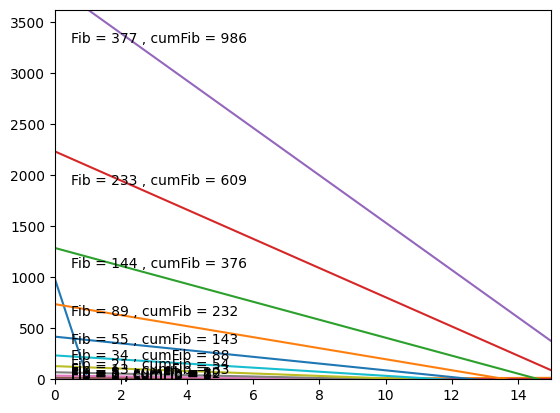

In [90]:
x = np.linspace(0,len(N),100)
for n in range(0, len(N)):
    y = fib[n]*(x-n) + cumfib[n-1]*(n+1-x) # Equação da reta que liga fib(n) e cumfib(n-1)  (diagonal)
    plt.plot(x,y)
    plt.text(0.5, fib[n]+(cumfib[n-1]-fib[n])*n*0.9, "Fib = " + str(fib[n])+" , cumFib = "+str(cumfib[n]))
plt.xlim(0,len(N))
plt.ylim(0,fib[n]+(cumfib[n-1]-fib[n])*n)

In [91]:
def generate_color_list(n):
    # Usar o colormap para obter uma lista de n cores
    cmap = plt.cm.get_cmap('tab20_r', n)
    color_list = [cmap(i) for i in range(n)]
    return color_list

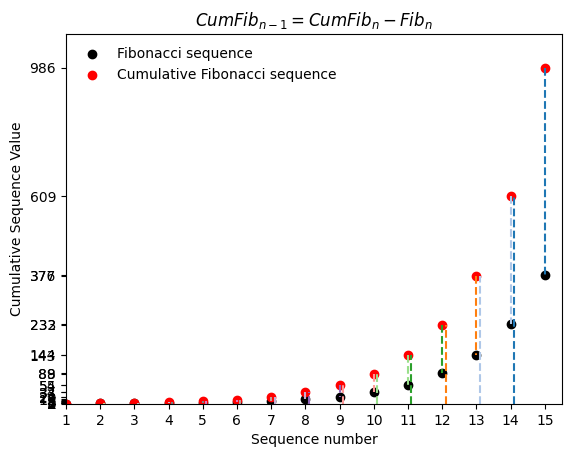

In [92]:
plt.figure(5)
plt.scatter(N, fib, color = 'black', label='Fibonacci sequence')
plt.scatter(N, cumfib,color = 'red', label='Cumulative Fibonacci sequence')
i=0
colors = generate_color_list(n+1)
while i < n+1:
    plt.plot([i+1, i+1], [cumfib[i], fib[i]], '--', color = colors[i])
    plt.plot([i+0.1, i+0.1], [0, cumfib[i] - fib[i]], '--', color = colors[i])
    i = i+1
    if i == n:
        plt.title("$CumFib_{n-1} =CumFib_n - Fib_{n}$")
        
plt.axis([1, len(N)+0.5, 0, max(cumfib[1:])*1.1])
plt.xticks(np.arange(1, n+2, 1))
plt.yticks(np.unique(np.concatenate((fib, cumfib))))
plt.xlabel('Sequence number')
plt.ylabel('Cumulative Sequence Value')
plt.legend(loc='upper left', frameon = False)
plt.show()

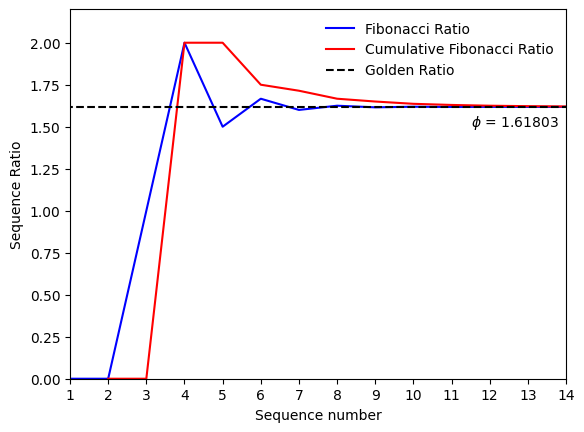

In [110]:
# Plotting Fibonacci ratio
plt.figure(4)
cumratio = np.zeros(n)
for i in range(2, n):
    cumratio[i] = cumfib[i] / cumfib[i-1]

plt.plot(N, ratio, '-b', label = 'Fibonacci Ratio')
plt.plot(N[1:], cumratio, '-r', label = 'Cumulative Fibonacci Ratio')
phi = float(GoldenRatio)
plt.hlines(xmin = 0, xmax = n, y = phi, linestyles='dashed', color = 'black', label = 'Golden Ratio')
plt.text(11.5, phi*0.93, "$\phi$ = " + str(f"{phi:.5f}"))
plt.axis([1, n, 0, max(ratio[1:])*1.1])
plt.xticks(np.arange(1, n+1, 1))
plt.xlabel('Sequence number')
plt.ylabel('Sequence Ratio')
plt.legend(loc='best', frameon = False)
plt.show()